In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
p=1
m=1
k=1
e=0.5
eta=10**(-2)
a=p/(1-e**2)
r0=a*(1+e)
h=eta*k*a
M=np.sqrt(p*k*m)

alpha=0

In [3]:
v0=M/r0*m
v0x=-v0*np.sin(alpha)
v0y=v0*np.cos(alpha)
x0=r0*np.cos(alpha)
y0=r0*np.sin(alpha)

In [4]:
def Fx(x,y): # Acceleration in the x direction
    r=np.sqrt(x**2+y**2)
    mr_ddot = (k/r**2)-((2*m*h)/(m*r**3))
    Fx_ret=-m*x*mr_ddot/r
    return Fx_ret

def Fy(x,y): # Acceleration in the y direction
    r=np.sqrt(x**2+y**2)
    mr_ddot = (k/r**2)-((2*m*h)/(m*r**3))
    Fy_ret=-m*y*mr_ddot/r
    return Fy_ret

In [5]:
def calc_regz(phi):
    return p/(1+e*np.cos(phi-np.pi))

def calc_xegz(phi):
    x_ret=calc_regz(phi)*np.cos(phi*(1-m*h/M**2))
    return x_ret

def calc_yegz(phi):
    y_ret=calc_regz(phi)*np.sin(phi*(1-m*h/M**2))
    return y_ret

In [6]:
# We want at least 10 orbits, so we set Tmax >> 10*T, by the Kepler approximation
Tmax=4*np.pi/np.sqrt((k/r0**3)-(2*h/r0**4))
dt=Tmax/100000
t=np.arange(0.0,Tmax+dt,dt)
npts=len(t)

def func(P,t):
    x=P[0]
    y=P[2]
    return[P[1],Fx(x,y)/m,P[3],Fy(x,y)/m]
P0 = [x0,v0x,y0,v0y]

y=odeint(func,P0,t)

In [7]:
phi=np.arange(0,8*np.pi,np.pi/32)
xegz = calc_xegz(phi)
yegz = calc_yegz(phi)

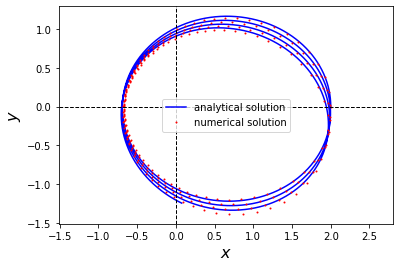

In [8]:
fig1=plt.figure(1)

plt.plot(y[:,0],y[:,2],color='b',ls='-',lw=1.5)
plt.plot(xegz,yegz,'o',color='r',markersize=1)
plt.legend(["analytical solution","numerical solution"])
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$y$',fontsize=16)
plt.axhline(y=0,color='k',lw=1,ls='--')
plt.axvline(x=0,color='k',lw=1,ls='--')
plt.axis('equal')

fig1.savefig("plot3.png", dpi=600)

In [9]:
# Here we encapsulate the function to make drawing the below easier
def everything(e,eta):
    a=p/(1-e**2)
    r0=a*(1+e)
    h=eta*k*a
    M=np.sqrt(p*k*m)
    v0=M/r0*m
    v0y=v0
    x0=r0
    def Fx(x,y):
        r=np.sqrt(x**2+y**2)
        mr_ddot = (k/r**2)-((2*m*h)/(m*r**3))
        Fx_ret=-m*x*mr_ddot/r
        return Fx_ret
    def Fy(x,y):
        r=np.sqrt(x**2+y**2)
        mr_ddot = (k/r**2)-((2*m*h)/(m*r**3))
        Fy_ret=-m*y*mr_ddot/r
        return Fy_ret
    def calc_regz(phi):
        return p/(1+e*np.cos(phi-np.pi))
    def calc_xegz(phi):
        x_ret=calc_regz(phi)*np.cos(phi*(1-m*h/M**2))
        return x_ret
    def calc_yegz(phi):
        y_ret=calc_regz(phi)*np.sin(phi*(1-m*h/M**2))
        return y_ret
    Tmax=4*np.pi/np.sqrt((k/r0**3)-(2*h/r0**4))
    dt=Tmax/100000
    t=np.arange(0.0,Tmax+dt,dt)
    npts=len(t)
    def func(P,t):
        x=P[0]
        y=P[2]
        return[P[1],Fx(x,y)/m,P[3],Fy(x,y)/m]
    P0 = [x0,v0x,y0,v0y]
    r=odeint(func,P0,t)
    xcalc=r[:,0]
    ycalc=r[:,2]
    xegz = calc_xegz(phi)
    yegz = calc_yegz(phi)
    return t, xcalc, ycalc, xegz, yegz

In [10]:
fig2, axs = plt.subplots(3, 7)
plt.legend(["analytical solution","numerical solution"])
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$y$',fontsize=16)
plt.axhline(y=0,color='k',lw=1,ls='--')
plt.axvline(x=0,color='k',lw=1,ls='--')

e_a=[0.2,0.5,0.8]
eta_a=[10**(-1),10**(-2),10**(-3),10**(-4),10**(-5),10**(-6),10**(-7)]

for i in range(3):
    for j in range(7):
        s=everything(e_a[i],eta_a[j])
        axs[i,j].plot(s[1],s[2],color='b',ls='-',lw=1.5)
        axs[i,j].plot(s[3],s[4],'o',color='r',markersize=1)
        axs[i,j].axis('equal')
        axs[i,j].axis('off')
        
fig2.savefig("plot4.png", dpi=1200)

From left to the right the value of $\eta$ steps in orders of magnitude, with the rightmost column representing $10^{-7}$, which is similar to Mercury, and the leftmost is 0.1.